Trace names are client_id, sample_path, label_name, label_id
100
dict_values([183, 269, 310, 321, 154, 177, 178, 152, 159, 105, 130, 409, 175, 324, 235, 87, 147, 113, 365, 180, 374, 156, 162, 234, 158, 182, 178, 140, 144, 166, 162, 180, 152, 183, 373, 179, 173, 140, 155, 268, 294, 305, 322, 178, 179, 326, 349, 245, 175, 274, 167, 182, 175, 163, 183, 242, 286, 334, 213, 179, 183, 383, 283, 174, 154, 173, 302, 332, 356, 183, 140, 180, 149, 180, 178, 140, 398, 182, 294, 239, 370, 263, 170, 171, 363, 178, 124, 169, 116, 186, 178, 355, 328, 158, 171, 284, 403, 168, 100, 166])


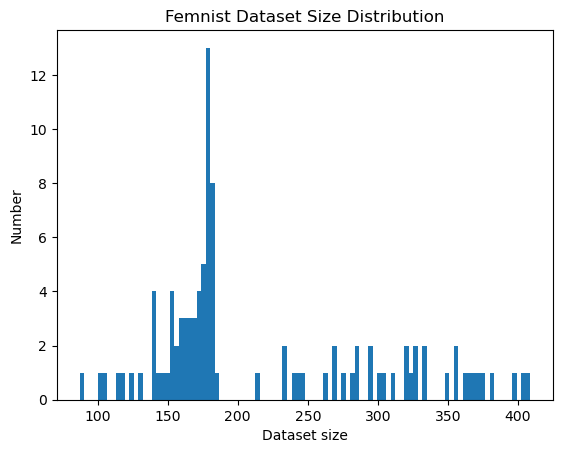

In [2]:
import csv
import matplotlib.pyplot as plt

unique_client_ids = {}
data_map_file = '../datasets/femnist/client_data_mapping/test.csv'
with open(data_map_file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    read_first = True
    sample_id = 0

    client_id = 0
    size_dict = {}

    for row in csv_reader:
        if read_first:
            print(f'Trace names are {", ".join(row)}')
            read_first = False
        else:
            idx = row[0]
            if idx not in unique_client_ids:
                unique_client_ids[idx] = client_id
                if client_id < 100:
                    size_dict[client_id] = 0
                client_id += 1

            if unique_client_ids[idx] < 100:
                size_dict[unique_client_ids[idx]] += 1
            

print(len(size_dict))
print(size_dict.values())
plt.hist(size_dict.values(), bins=100)
plt.xlabel('Dataset size')
plt.ylabel('Number')
plt.title('Femnist Dataset Size Distribution')
plt.show()

In [5]:
import pickle
file_path = '../datasets/device_info/client_dataset_size'

# Pickle and dump the data to the file
with open(file_path, 'wb') as file:
    pickle.dump(size_dict, file)

500000


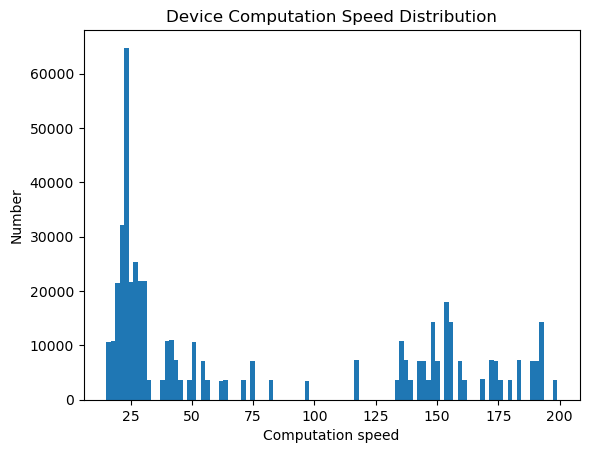

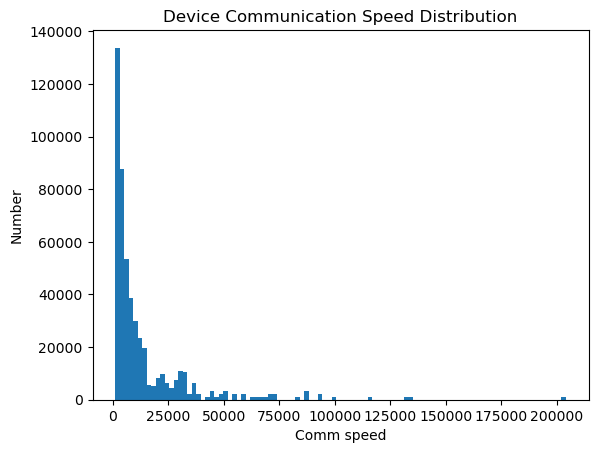

In [3]:
import pickle
import matplotlib.pyplot as plt

client_speed_dict = None
with open('../datasets/device_info/client_device_capacity', 'rb') as client_file:
    client_speed_dict = pickle.load(client_file)

speed_list = []
comm_list = []
for id, value in client_speed_dict.items():
    speed_list.append(value["computation"])
    comm_list.append(value["communication"])

print(len(client_speed_dict))

plt.hist(speed_list, bins=100)
plt.xlabel('Computation speed')
plt.ylabel('Number')
plt.title('Device Computation Speed Distribution')
plt.show()

plt.hist(comm_list, bins=100)
plt.xlabel('Comm speed')
plt.ylabel('Number')
plt.title('Device Communication Speed Distribution')
plt.show()


In [1]:
import pickle
import matplotlib.pyplot as plt

client_avail = None
with open('../datasets/device_info/client_behave_trace', 'rb') as client_file:
    client_avail = pickle.load(client_file)
    


In [4]:
print(client_avail[83]['active'])
print(client_avail[83]['inactive'])
print(len(client_avail))

[0, 741, 984, 2967, 3547, 4504, 5707, 35843, 37873, 66475, 67255, 70886, 72407, 72623, 73726, 75283, 77236, 80215, 91961, 92815, 93341, 123503, 148472, 151472, 152029, 152491, 163258, 166658, 166975, 168084, 168406, 171257, 173335, 173363, 174541, 178681, 184709, 195081, 207068, 209239, 210282, 216457, 219845, 221232, 222642, 223836, 225763, 233095, 233785, 233915, 235537, 238344, 238584, 241591, 243231, 244516, 244854, 244886, 244940, 245804, 250155, 250867, 253813, 253848, 253871, 254123, 256275, 256539, 258971, 262239, 263085, 266851, 302783, 308398, 310935, 314940, 315693, 316126, 316305, 316454, 318379, 321406, 322240, 322382, 323108, 325908, 332078, 334077, 334192, 345292, 346451, 346575, 346609, 349830, 351688, 352348, 353395, 384694, 385339, 385590, 386423, 386440, 387143, 393047, 395472, 397904, 398953, 398976, 401219, 404635, 405534, 410877, 416763, 417157, 417312, 417773, 421535, 423872, 426060, 427163, 432445, 439697, 486289, 497816, 505625, 510617, 513788, 513909, 514009]


In [4]:
id_list = [ i + 1 for i in range(10)]
val_list = [client_avail[i] for i in id_list]
sum = 0
num = 0
for val in val_list:
    active_list = val["active"]
    inactive_list = val["inactive"]
    for x in range(len(active_list)):
        sum += inactive_list[x] - active_list[x]
        num += 1

print(sum / num)

18876.267647058823


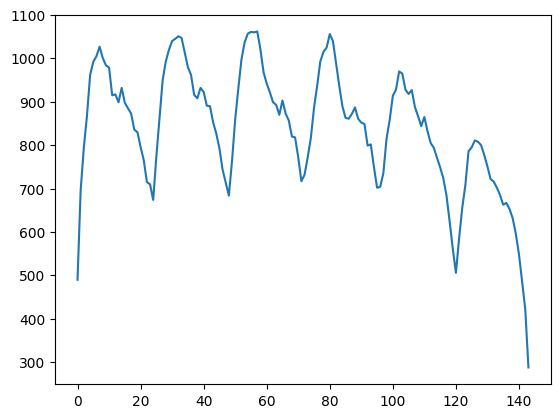

In [7]:
device = {i: client_avail[i+1] for i in range(1500)}

avail_cnt = [0 for _ in range(24 * 6)]
for i in range(len(avail_cnt)):
    for id, val in device.items():
        inactive_list = val["inactive"]
        active_list = val["active"]
        for x in range(len(active_list)):
            if i * 60 * 60>= active_list[x] and i * 60 * 60< inactive_list[x]:
                avail_cnt[i] += 1

plt.plot(avail_cnt)
plt.show()

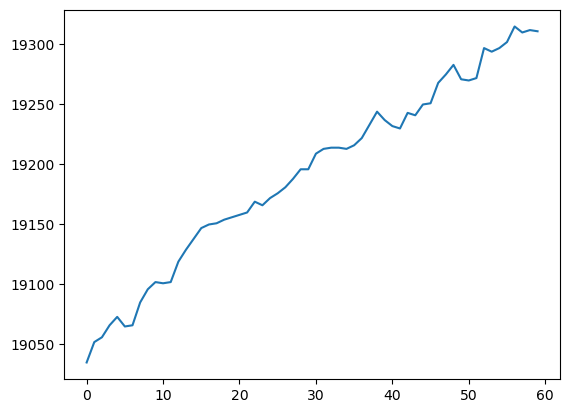

In [21]:
avail_cnt = [0 for _ in range(60)]
for i in range(len(avail_cnt)):
    for id, val in client_avail.items():
        inactive_list = val["inactive"]
        active_list = val["active"]
        for x in range(len(active_list)):
            if i + 60 >= active_list[x] and i + 60 < inactive_list[x]:
                avail_cnt[i] += 1

plt.plot(avail_cnt)
plt.show()